In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics')


import pandas as pd
import numpy as np
import Basics.Data.Metrica_IO as mio
from Position_data.Tracking_Data import tracking_data
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import Position_data.PitchControl.pitch_control as pc
from Basics.Data.DFL_data import parse_dfl_pos_data

## metrica data

In [2]:
data_dir = 'sample-data-master/data/'
game_id = 2
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch')
print(td_object)
td_object.dimensions

Reading team: away
Reading team: home
tracking_data object of metrica of shape (141156, 56).


{'y': {'data': (1, 0),
  'pitch': (0, 68),
  'home_columns': ['Home_11_y',
   'Home_1_y',
   'Home_2_y',
   'Home_3_y',
   'Home_4_y',
   'Home_5_y',
   'Home_6_y',
   'Home_7_y',
   'Home_8_y',
   'Home_9_y',
   'Home_10_y',
   'Home_12_y',
   'Home_13_y',
   'Home_14_y'],
  'away_columns': ['Away_25_y',
   'Away_15_y',
   'Away_16_y',
   'Away_17_y',
   'Away_18_y',
   'Away_19_y',
   'Away_20_y',
   'Away_21_y',
   'Away_22_y',
   'Away_23_y',
   'Away_24_y',
   'Away_26_y'],
  'ball_columns': ['ball_y'],
  'delta_data': -1,
  'delta_pitch': 68,
  'scaling_factor': -68.0},
 'x': {'data': (0, 1),
  'pitch': (0, 105),
  'home_columns': ['Home_11_x',
   'Home_1_x',
   'Home_2_x',
   'Home_3_x',
   'Home_4_x',
   'Home_5_x',
   'Home_6_x',
   'Home_7_x',
   'Home_8_x',
   'Home_9_x',
   'Home_10_x',
   'Home_12_x',
   'Home_13_x',
   'Home_14_x'],
  'away_columns': ['Away_25_x',
   'Away_15_x',
   'Away_16_x',
   'Away_17_x',
   'Away_18_x',
   'Away_19_x',
   'Away_20_x',
   'Away_21_x

(<Figure size 640x480 with 1 Axes>, <Axes: >)

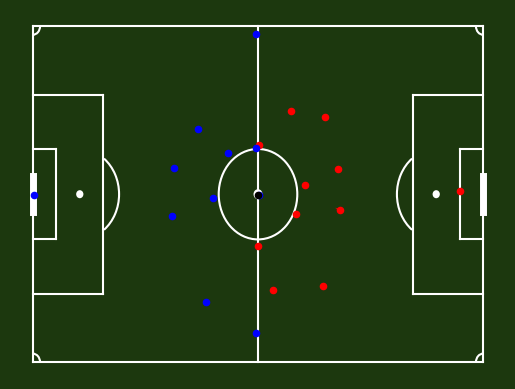

In [3]:
td_object.plot_players(frame=51, velocities=True)

In [4]:
td_object.Home_GK, td_object.Away_GK 

('11', '25')

In [5]:
# intialize by function
player_object = pc.get_player_from_data(td_object=td_object, pid=8, team='Home')
print(player_object)
print(player_object.inframe)
player_object.org_data.head()

Player 8 playing for the Home team.
False


,Period,Time [s],Home_8_x,Home_8_y,Home_8_vx,Home_8_vy,Home_8_speed
Frame,,,,,,,
1,1,0.04,55.82115,16.94288,NaN,NaN,NaN
2,1,0.08,55.82115,16.94288,NaN,NaN,NaN
3,1,0.12,55.82115,16.94288,NaN,NaN,NaN
4,1,0.16,55.82115,16.94288,NaN,NaN,NaN
5,1,0.20,55.82115,16.94288,NaN,NaN,NaN


In [6]:
# initialize by function and frame
player_object = pc.get_player_from_data(td_object=td_object, pid=11, frame=51, team='Home')
print(player_object)
print(player_object.inframe)
player_object.org_data

Player 11 playing for the Home team. Data for frame 51. 
True


Period            1.000000
Time [s]          2.040000
Home_11_x        99.530550
Home_11_y        34.689520
Home_11_vx       -0.300000
Home_11_vy       -0.323000
Home_11_speed     0.440828
Name: 51, dtype: float64

In [7]:
# intitalize manually
# requires GK information and team
# and frame cannot be filtered!
# not recommended!
# returns all players from team

player_object2 = pc.player(data=td_object.data, pid=1, GK=True, team='Home', td_object=td_object)
print(player_object2)
print(player_object2.inframe)
player_object2.org_data.head()

Player 1 playing for the Home team.
True


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,98.98875,33.71916,68.0526,48.5486,71.1396,38.89396,73.3761,30.18792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,98.98875,33.71916,68.0526,48.5486,71.1396,38.89396,73.3761,30.18792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,98.98875,33.71916,68.0526,48.5486,71.1396,38.89396,73.3761,30.18792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,98.98875,33.71916,68.0526,48.5486,71.1396,38.89396,73.3761,30.18792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,98.98875,33.71916,68.0526,48.5486,71.1396,38.89396,73.3761,30.18792,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
players = pc.get_all_players(td_object=td_object, frame=51)
len(players), players

(22,
  <Position_data.PitchControl.pitch_control.player at 0x25d69ffe1a0>])

In [9]:
players = pc.get_all_players(td_object=td_object, frame=51, teams=['Home'])
len(players), players

(11,
  <Position_data.PitchControl.pitch_control.player at 0x25d001c76d0>])

In [10]:
players[0].simple_time_to_intercept(r_final=np.array([90, 10]))
players[0].probability_intercept_ball(T=5)

3.81414070752029e-09

In [11]:
PPCFa,xgrid,ygrid = pc.pitch_control_at_frame(frame=51, td_object=td_object)
PPCFa

array([[0.        , 0.        , 0.        , ..., 0.9906474 , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.99017164, 1.        ,
        1.        ]])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

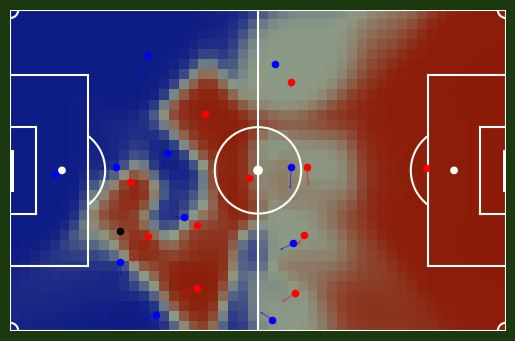

In [12]:
pc.plot_pitch_control(td_object=td_object, frame=890, velocities=True)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

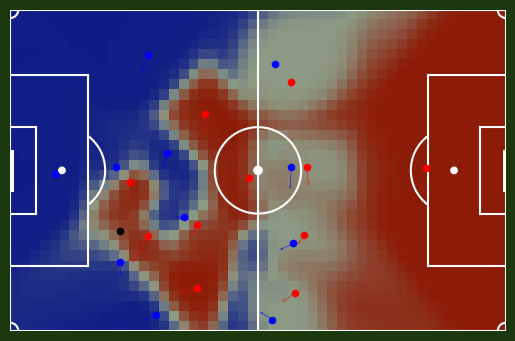

In [13]:
pc.plot_pitch_control(td_object=td_object, frame=890, velocities=True, attacking_team='Away')

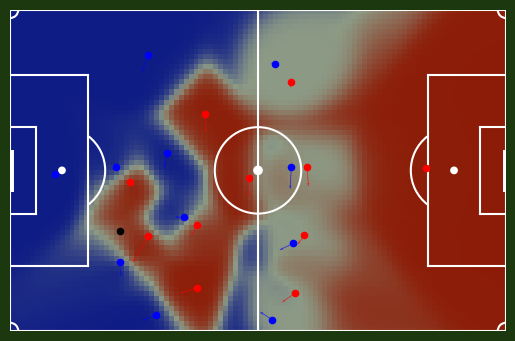

In [14]:
fig, ax = pc.plot_pitch_control(td_object=td_object, frame=890, velocities=True, n_grid_cells_x=100)

In [16]:
params = pc.default_model_params(kappa_def=3, td_object=td_object)
params

{'max_player_accel': 7.0,
 'max_player_speed': 5.0,
 'reaction_time': 0.7,
 'tti_sigma': 0.45,
 'kappa_def': 3,
 'lambda_att': 4.3,
 'lambda_def': 12.899999999999999,
 'lambda_gk': 38.699999999999996,
 'average_ball_speed': 15.0,
 'int_dt': 0.04,
 'max_int_time': 10,
 'model_converge_tol': 0.01,
 'time_to_control_att': 3.3202550055547313,
 'time_to_control_def': 2.249285194859826}

(<Figure size 640x480 with 1 Axes>, <Axes: >)

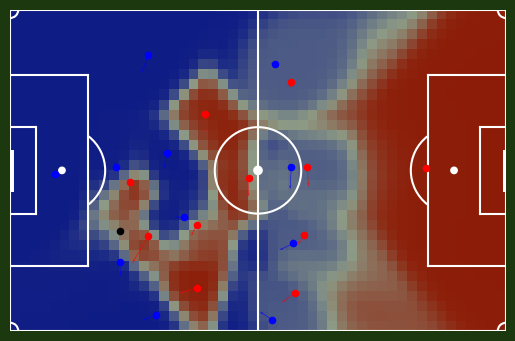

In [17]:
pc.plot_pitch_control(td_object=td_object, frame=890, velocities=True, params=params)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

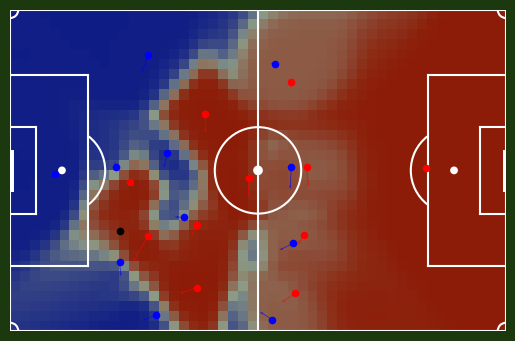

In [18]:
pc.plot_pitch_control(td_object=td_object, frame=890, velocities=True, params=params, attacking_team='Away')

In [ ]:
#pc.animate_pitch_control(td_object=td_object, start_frame=51, end_frame=151, fname='metrica_pc_clip', velocities=True)

# dfl data

In [19]:
pos_filepath = '../DFL_04_02_positions_raw_DFL-COM-000001_DFL-MAT-0027AD.xml'
mi_filepath = '../DFL_02_01_matchinformation_DFL-COM-000001_DFL-MAT-0027AD.xml'

td_dfl, x_range_data, y_range_data = parse_dfl_pos_data(pos_filepath=pos_filepath, mi_filepath=mi_filepath)
td_dfl

,ball_x,ball_y,ballstatus,possession,GameSection,Time,Time [s],Home_30_x,Home_30_y,Home_27_x,...,Away_15_y,Away_5_x,Away_5_y,Away_4_x,Away_4_y,Away_11_x,Away_11_y,Away_17_x,Away_17_y,Period
0,-0.38,-0.28,1.0,2.0,firstHalf,00:00:00.000000,0,-15.89,18.66,-9.7,...,33.4,24.99,12.99,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-0.35,-0.3,1.0,2.0,firstHalf,00:00:00.040000,0.04,-15.89,18.66,-9.71,...,33.4,24.99,13.01,NaN,NaN,NaN,NaN,NaN,NaN,1
2,-0.33,-0.32,1.0,2.0,firstHalf,00:00:00.080000,0.08,-15.89,18.66,-9.73,...,33.4,24.99,13.02,NaN,NaN,NaN,NaN,NaN,NaN,1
3,-0.31,-0.33,1.0,2.0,firstHalf,00:00:00.120000,0.12,-15.89,18.66,-9.75,...,33.41,25.01,13.03,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.09,-0.13,1.0,2.0,firstHalf,00:00:00.160000,0.16,-15.88,18.66,-9.77,...,33.42,25.01,13.05,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137214,23.04,6.63,0.0,2.0,secondHalf,01:31:17.360000,5488.56,NaN,NaN,NaN,...,1.56,8.51,9.1,32.13,33.65,37.0,-0.68,36.97,10.07,2
137215,23.02,6.62,0.0,2.0,secondHalf,01:31:17.400000,5488.6,NaN,NaN,NaN,...,1.57,8.53,9.11,32.1,33.64,36.98,-0.64,36.95,10.11,2
137216,23.01,6.62,0.0,2.0,secondHalf,01:31:17.440000,5488.64,NaN,NaN,NaN,...,1.58,8.54,9.13,32.07,33.63,36.96,-0.61,36.92,10.15,2
137217,23.0,6.61,0.0,2.0,secondHalf,01:31:17.480000,5488.68,NaN,NaN,NaN,...,1.58,8.56,9.13,32.03,33.62,36.94,-0.57,36.9,10.19,2


In [20]:
td_object_dfl = tracking_data(td_dfl, data_source='dfl', scale_to_pitch='myPitch')
print(td_object_dfl)
td_object_dfl.data.head()

tracking_data object of dfl of shape (137219, 64).


,ball_x,ball_y,ballstatus,possession,GameSection,Time,Time [s],Home_30_x,Home_30_y,Home_27_x,...,Away_15_y,Away_5_x,Away_5_y,Away_4_x,Away_4_y,Away_11_x,Away_11_y,Away_17_x,Away_17_y,Period
0,52.101,33.72,1.0,2.0,firstHalf,00:00:00.000000,0,35.8155,52.66,42.315,...,67.4,78.7395,46.99,NaN,NaN,NaN,NaN,NaN,NaN,1
1,52.1325,33.7,1.0,2.0,firstHalf,00:00:00.040000,0.04,35.8155,52.66,42.3045,...,67.4,78.7395,47.01,NaN,NaN,NaN,NaN,NaN,NaN,1
2,52.1535,33.68,1.0,2.0,firstHalf,00:00:00.080000,0.08,35.8155,52.66,42.2835,...,67.4,78.7395,47.02,NaN,NaN,NaN,NaN,NaN,NaN,1
3,52.1745,33.67,1.0,2.0,firstHalf,00:00:00.120000,0.12,35.8155,52.66,42.2625,...,67.41,78.7605,47.03,NaN,NaN,NaN,NaN,NaN,NaN,1
4,53.6445,33.87,1.0,2.0,firstHalf,00:00:00.160000,0.16,35.826,52.66,42.2415,...,67.42,78.7605,47.05,NaN,NaN,NaN,NaN,NaN,NaN,1


(<Figure size 640x480 with 1 Axes>, <Axes: >)

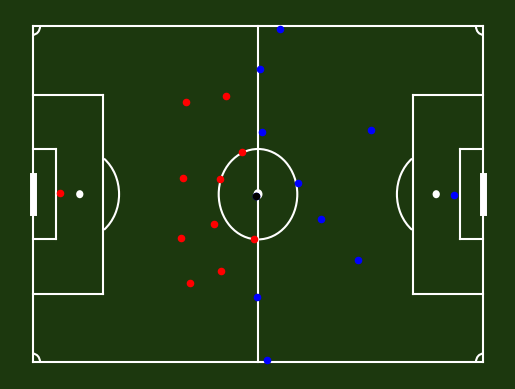

In [21]:
td_object_dfl.plot_players(frame=0, velocities=True)

In [22]:
# intialize by function
player_object = pc.get_player_from_data(td_object=td_object_dfl, pid=30, team='Home')
print(player_object)
print(player_object.inframe)
player_object.org_data.head()

Player 30 playing for the Home team.
False


,Time,Time [s],Home_30_x,Home_30_y,Period,Home_30_vx,Home_30_vy,Home_30_speed
0,00:00:00.000000,0,35.8155,52.66,1,NaN,NaN,NaN
1,00:00:00.040000,0.04,35.8155,52.66,1,NaN,NaN,NaN
2,00:00:00.080000,0.08,35.8155,52.66,1,NaN,NaN,NaN
3,00:00:00.120000,0.12,35.8155,52.66,1,NaN,NaN,NaN
4,00:00:00.160000,0.16,35.826,52.66,1,0.0375,-0.035714,0.051786


In [23]:
player_object = pc.get_player_from_data(td_object=td_object_dfl, pid=30, frame=1, team='Home')
print(player_object)
print(player_object.inframe)
player_object.org_data

Player 30 playing for the Home team. Data for frame 1. 
True


Time             00:00:00.040000
Time [s]                    0.04
Home_30_x                35.8155
Home_30_y                  52.66
Period                         1
Home_30_vx                   NaN
Home_30_vy                   NaN
Home_30_speed                NaN
Name: 1, dtype: object

In [24]:
players = pc.get_all_players(td_object=td_object_dfl, frame=1)
len(players), players

(22,
  <Position_data.PitchControl.pitch_control.player at 0x25d017ab3a0>])

In [25]:
PPCFa,xgrid,ygrid = pc.pitch_control_at_frame(frame=1, td_object=td_object_dfl)
PPCFa

array([[1.        , 1.        , 0.99040709, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.99271659, ..., 0.        , 0.        ,
        0.        ]])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

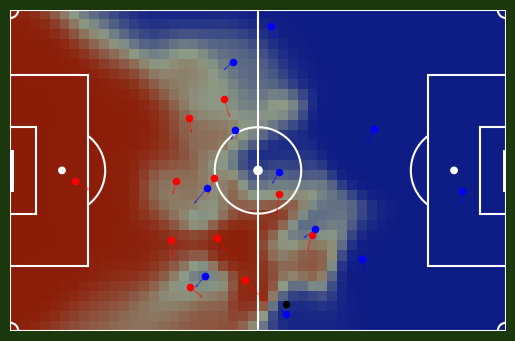

In [26]:
pc.plot_pitch_control(td_object=td_object_dfl, frame=100, velocities=True)

In [ ]:
#pc.animate_pitch_control(td_object=td_object_dfl, start_frame=1, end_frame=101, fname='dfl_pc_clip', velocities=True,
#                        progress_steps=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

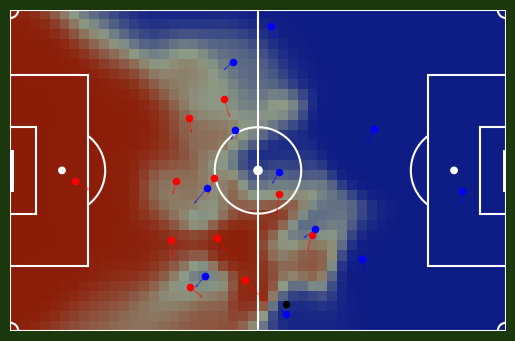

In [27]:
pc.plot_pitch_control(td_object=td_object_dfl, frame=100, velocities=True, offside=True)